In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD, PolyaGammaDistribution
include("zz_structures_DuLuSuSe.jl")
include("polyagamma.jl")

get_clustering (generic function with 1 method)

In [2]:
dat = "data/GZZ_data2.jld"
X = load(dat, "X")
y = load(dat, "y")
ξ_true = load(dat, "xi_true");
d, Nobs = size(X);

In [32]:
my_ll = ll_logistic(X,y);
prior = HS_prior(size(X,1), 1);
my_model = model(my_ll, prior);

In [33]:
size(my_ll.X)

(100, 200)

In [36]:
xi_samples = PG(my_model, rand(d), 10^4);

In [37]:
ci = zeros(d,2)
for i in 1:d 
    ci[i,:] = percentile(xi_samples[i,:], [5,95])
end

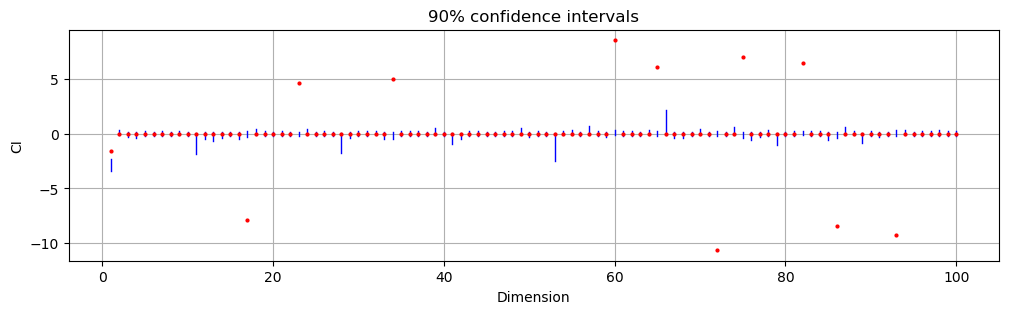

In [38]:
fig = figure("pyplot_barplot",figsize=(12,3))
for i in 1:d 
    plot([i,i], ci[i,:], color="blue", linewidth=1)
end
plot(1:d , ξ_true, "o", markersize=4, color="red", markersize=2)
grid(true)
xlabel("Dimension")
ylabel("CI")
title("90% confidence intervals");

In [41]:
maxlag = 100
acfs_xi = zeros(d, maxlag)
for i in 1:d 
    acfs_xi[i,:] = acf(xi_samples[i,:], maxlag)
end

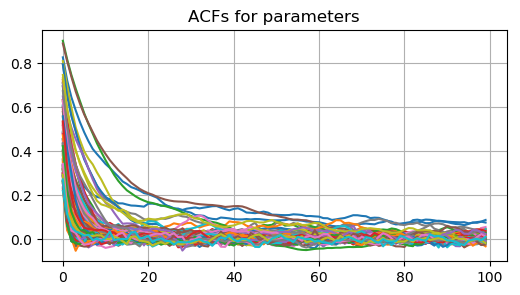

In [42]:
fig = figure("pyplot_subplot_mixed", figsize=(6,3))
for i in 1:d 
    plot(acfs_xi[i,:])
end
grid(true)
title("ACFs for parameters");

In [40]:
sum(acfs_xi[:,1:100],2)

100×1 Array{Float64,2}:
 21.3119  
  0.846519
  2.06396 
  0.47454 
  1.61167 
 11.0998  
  5.95155 
  2.63114 
  0.968618
  1.52869 
  1.24816 
  6.70566 
  2.88754 
  ⋮       
  6.26416 
  3.10176 
  1.04929 
  0.861513
 17.2678  
  1.21708 
  1.86584 
  0.365416
  1.59769 
  2.72262 
  1.41253 
  1.76928 

In [16]:
x = sprand(10^3,10^5, 1e-2)
A = x*x'
b = rand(size(x,1));

In [18]:
@timeit A \ b;

10 loops, best of 3: 46.17 ms per loop


In [20]:
@timeit inv(full(A));

10 loops, best of 3: 37.30 ms per loop


In [46]:
(d^2.5)*Nobs

2.0e7